# Setting up for Importing the Data

In [ ]:
import os

cwd = os.getcwd()
print(cwd)

c:\Users\andre\Documents\Computer Science Masters\Data Visualization\Semester-project\Useful Scripts


In [ ]:
#path = "C:\Users\andre\Documents\Computer Science Masters\Data Visualization\Semester-project\Useful Scripts"
#!%cd path

# Line Chart - Average Ratings Throughout the Years

In [ ]:
import pandas as pd
import numpy as np

# Only show 10 rows
pd.set_option('display.max_rows', 100)

# Load the data
df_reviews = pd.read_csv("crosslisted_reviews.csv")
df_business = pd.read_csv("cleaned_businessV2.csv")

# Remove any rows, where there are NaN values in the subset
df_business = df_business.dropna(subset=['address'])

# Immediately rename this column to avoid confusion after the merge.
# The crosslisted_reviews.csv and cleaned_businessV2.csv each have their own "stars" column.
# This renaming is to make sure we know which "stars" come from where.
df_reviews = df_reviews.rename(columns={'stars': 'review_stars'}) 
df_business = df_business.rename(columns={'stars': 'business_stars'})

# Join the two datasets on business_id
df_joined = pd.merge(df_reviews, df_business, how="inner", on='business_id')
df_joined.head(3)


,review_id,business_id,review_stars,date,name,address,city,state,postal_code,latitude,longitude,business_stars,review_count,is_open,categories,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday
0,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,Zaika,2481 Grant Ave,Philadelphia,PA,19114.0,40.079848,-75.025080,4.0,181,1,"Halal, Pakistani, Restaurants, Indian",Closed,11:00-21:00,11:00-21:00,11:00-21:00,11:00-22:00,11:00-22:00,11:00-21:00
1,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1,2015-09-23 23:10:31,Dmitri's,795 S 3rd St,Philadelphia,PA,19147.0,39.938013,-75.148131,4.0,273,0,"Mediterranean, Restaurants, Seafood, Greek",Closed,Closed,17:30-21:00,17:30-21:00,17:30-22:00,17:30-22:00,17:00-21:00
2,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4,2009-10-14 19:57:14,LaScala's,615 Chestnut St,Philadelphia,PA,19106.0,39.949529,-75.152139,3.5,367,0,"Pizza, Restaurants, Italian, Salad",Closed,11:30-21:00,11:30-21:00,12:00-20:00,11:30-22:00,11:30-22:00,15:00-01:00


In [ ]:
# Preprocess
# Convert object types to string
df_joined = df_joined.convert_dtypes()

# TODO: Might need to change or delete this line later such as to make the server able to include more categories.
categories_of_interest = ['Chinese', 'Japanese', 'Italian', 'Polish', 'Scandinavian']

# Remove any rows, where there are NaN values in the subset
df_joined = df_joined.dropna(subset=['categories'])

# Init new column with 'other'. It will be overwritten afterwards
df_joined['category_of_interest'] = "Other"

# Overwrite above column with category of interest
for item in categories_of_interest:
    df_joined.loc[df_joined['categories'].str.contains(item), 'category_of_interest'] = item

# Extract year my splitting the date string on "-" and taking the first element.
df_joined['Year'] = df_joined.date.apply(lambda cell: cell.split("-")[0])

# Convert to numeric
df_joined['Year'] = pd.to_numeric(df_joined['Year'])

df_joined.head()

,review_id,business_id,review_stars,date,name,address,city,state,postal_code,latitude,longitude,business_stars,review_count,is_open,categories,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday,category_of_interest,Year
0,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,2015-01-04 00:01:03,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.02508,4.0,181,1,"Halal, Pakistani, Restaurants, Indian",Closed,11:00-21:00,11:00-21:00,11:00-21:00,11:00-22:00,11:00-22:00,11:00-21:00,Other,2015
1,JrIxlS1TzJ-iCu79ul40cQ,04UD14gamNjLY0IDYVhHJg,1,2015-09-23 23:10:31,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,4.0,273,0,"Mediterranean, Restaurants, Seafood, Greek",Closed,Closed,17:30-21:00,17:30-21:00,17:30-22:00,17:30-22:00,17:00-21:00,Other,2015
2,8JFGBuHMoiNDyfcxuWNtrA,RZtGWDLCAtuipwaZ-UfjmQ,4,2009-10-14 19:57:14,LaScala's,615 Chestnut St,Philadelphia,PA,19106,39.949529,-75.152139,3.5,367,0,"Pizza, Restaurants, Italian, Salad",Closed,11:30-21:00,11:30-21:00,12:00-20:00,11:30-22:00,11:30-22:00,15:00-01:00,Italian,2009
3,oyaMhzBSwfGgemSGuZCdwQ,YtSqYv1Q_pOltsVPSx54SA,5,2013-06-24 11:21:25,Rittenhouse Grill,1701 Locust St,Philadelphia,PA,19103,39.948949,-75.169532,3.5,290,1,"Wine Bars, Restaurants, Nightlife, Steakhouses...",Closed,Closed,16:30-22:00,16:30-22:00,16:30-22:00,16:30-22:00,16:30-22:00,Other,2013
4,Xs8Z8lmKkosqW5mw_sVAoA,eFvzHawVJofxSnD7TgbZtg,5,2014-11-12 15:30:27,Good Karma Cafe,928 Pine St,Philadelphia,PA,19107,39.944609,-75.157833,4.0,249,1,"Food, Cafes, Coffee & Tea, Restaurants",07:00-17:00,07:00-17:00,07:00-17:00,07:00-17:00,07:00-17:00,07:00-17:00,07:00-17:00,Other,2014


In [ ]:
# Prepare for plot
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Group by columns of interest and summarise by mean
grouped_df = df_joined.groupby(['category_of_interest', 'Year'])['review_stars'].mean()

# Unstack to make ready for plotting. This produces a column for each category item.
df_unstacked = grouped_df.unstack(level=0)
df_unstacked.head()

category_of_interest,Chinese,Italian,Japanese,Other,Polish,Scandinavian
Year,,,,,,
2005,4.0,3.944444,4.5,3.915493,<NA>,<NA>
2006,4.058824,4.02439,4.305556,3.937722,5.0,<NA>
2007,3.923387,3.792683,3.807407,3.742663,2.666667,<NA>
2008,3.830046,3.708271,3.682303,3.671561,3.375,<NA>
2009,3.745217,3.665948,3.698529,3.669326,3.666667,<NA>


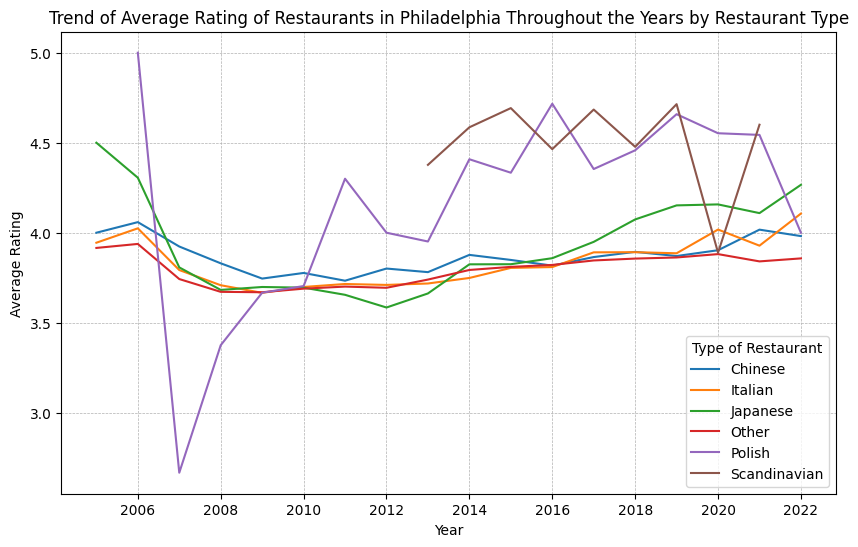

In [ ]:
# Plot

df_unstacked.plot(kind='line', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Trend of Average Rating of Restaurants in Philadelphia Throughout the Years by Restaurant Type')
plt.legend(title='Type of Restaurant')

# Set x-axis ticks to integers using MaxNLocator
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Set color scale to be color-blind friendly
plt.cm.tab20b

# Add grid lines
plt.grid(True)
plt.grid(which="both", linestyle='--', linewidth=0.5)

plt.show()

# Opening Hours 

In [142]:
categories_of_interest = ['Chinese', 'Japanese', 'Italian', 'Polish', 'Scandinavian']

# Rename Column names to make them easier to work with
df_businessV2.rename(columns={'hours/Monday' : 'hours_Monday',
    'hours/Tuesday' : 'hours_Tuesday',
    'hours/Wednesday' : 'hours_Wednesday',
    'hours/Thursday' : 'hours_Thursday',
    'hours/Friday' : 'hours_Friday',
    'hours/Saturday' : 'hours_Saturday',
    'hours/Sunday' : 'hours_Sunday'},
    inplace=True)

# Keep only columns of interest
columns_of_interest = ['hours_Monday', 'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday', 
                       'hours_Friday', 'hours_Saturday', 'hours_Sunday', 'stars', 'categories', 
                       'postal_code']

# Select only columns of interes
df_businessV2 = df_businessV2[columns_of_interest]

In [143]:
# Handle NaN values. There are no NaN values
df_businessV2.isna().sum()

hours_Monday       0
hours_Tuesday      0
hours_Wednesday    0
hours_Thursday     0
hours_Friday       0
hours_Saturday     0
hours_Sunday       0
stars              0
categories         0
postal_code        0
dtype: int64

In [144]:
# Convert column types to string
df_businessV2 = df_businessV2.convert_dtypes()
df_businessV2.dtypes

hours_Monday       string[python]
hours_Tuesday      string[python]
hours_Wednesday    string[python]
hours_Thursday     string[python]
hours_Friday       string[python]
hours_Saturday     string[python]
hours_Sunday       string[python]
stars                     Float64
categories         string[python]
postal_code                 Int64
dtype: object

In [145]:
# Create new column
df_businessV2['category_of_interest'] = "Other"
for item in categories_of_interest:
    df_businessV2.loc[df_businessV2['categories'].str.contains(item), 'category_of_interest'] = item

df_businessV2.head(3)

,hours_Monday,hours_Tuesday,hours_Wednesday,hours_Thursday,hours_Friday,hours_Saturday,hours_Sunday,stars,categories,postal_code,category_of_interest
0,07:00-20:00,07:00-20:00,07:00-20:00,07:00-20:00,07:00-21:00,07:00-21:00,07:00-21:00,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",19107,Other
2,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,11:30-20:30,Closed,4.5,"Korean, Restaurants",19147,Other
3,16:00-00:00,16:00-00:00,16:00-00:00,12:00-00:00,12:00-02:00,11:00-02:00,11:00-00:00,4.0,"Cocktail Bars, Bars, Italian, Nightlife, Resta...",19147,Italian


## Scatterplot for opening hours Monday

In [146]:
from datetime import datetime


def get_opening_float(time_interval):
    opening_time = time_interval.split("-")
    opening_hour, opening_minute = opening_time[0].split(":")
    opening_time_float = float(opening_hour) + float(opening_minute) / 60.0
    return opening_time_float

def get_open_duration_float(time_interval):
    # Split the string into start and end times
    start_time_str, end_time_str = time_interval.split('-')
    
    # Convert the strings to datetime objects
    start_time = datetime.strptime(start_time_str, "%H:%M")
    end_time = datetime.strptime(end_time_str, "%H:%M")
    
    # Calculate the difference in hours and return as a float
    time_difference = end_time - start_time
    hours = time_difference.total_seconds() / 3600
    
    return abs(hours)

test_time_interval = "18:30-17:45"
test_float = get_opening_float(test_time_interval)
test_duration = get_open_duration_float(test_time_interval)

print(test_float)
print(test_duration, type(test_duration))

18.5
0.75 <class 'float'>


C:\Users\andre\AppData\Local\Temp\ipykernel_32456\521208962.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_businessV2.groupby("rating_group")


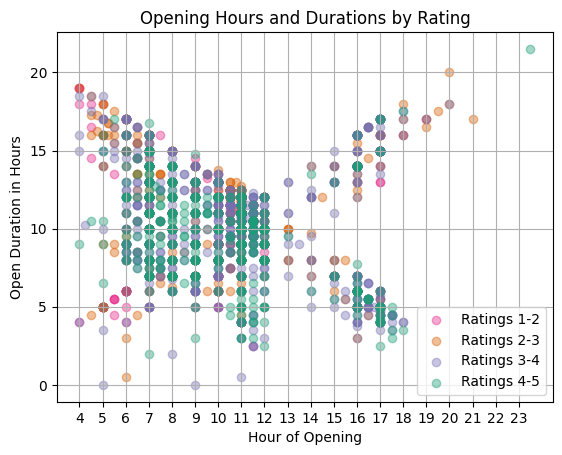

In [147]:


# Drop the columns where shops are closed
df_businessV2 = df_businessV2[df_businessV2["hours_Monday"] != "Closed"]

df_businessV2["Monday_Hour_Of_Opening_Float"] = df_businessV2["hours_Monday"].apply(get_opening_float)
df_businessV2["Monday_Open_Duration_Float"] = df_businessV2["hours_Monday"].apply(get_open_duration_float)

df_businessV2["rating_group"] = pd.cut(df_businessV2["stars"],
                                       bins=[1,2,3,4,5],
                                       labels=["Ratings 1-2", 
                                               "Ratings 2-3", 
                                               "Ratings 3-4", 
                                               "Ratings 4-5"])

colors = ["#e7298a", "#d95f02", "#7570b3", "#1b9e77"]

df_grouped = df_businessV2.groupby("rating_group")
for i, (group_name, group_df) in enumerate(df_grouped):
    plt.scatter(group_df["Monday_Hour_Of_Opening_Float"], 
                group_df["Monday_Open_Duration_Float"], 
                label = group_name,
                color = colors[i],
                alpha=0.4)

# Customize the plot
plt.xlabel('Hour of Opening')
plt.ylabel('Open Duration in Hours')
plt.title('Opening Hours and Durations by Rating')
plt.legend()
plt.grid(True)
# Set x-ticks to whole numbers
plt.xticks(range(int(min(df_businessV2["Monday_Hour_Of_Opening_Float"])), 
                 int(max(df_businessV2["Monday_Hour_Of_Opening_Float"]) + 1)))
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_32456\2866854466.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_businessV2.groupby("rating_group")


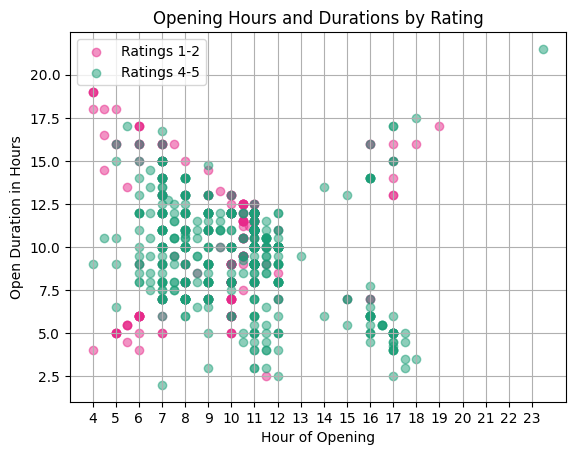

In [148]:
# Drop the columns where shops are closed
df_businessV2 = df_businessV2[df_businessV2["hours_Monday"] != "Closed"]

df_businessV2["Monday_Hour_Of_Opening_Float"] = df_businessV2["hours_Monday"].apply(get_opening_float)
df_businessV2["Monday_Open_Duration_Float"] = df_businessV2["hours_Monday"].apply(get_open_duration_float)

df_businessV2["rating_group"] = pd.cut(df_businessV2["stars"],
                                       bins=[1,2,3,4,5],
                                       labels=["Ratings 1-2", 
                                               "Ratings 2-3", 
                                               "Ratings 3-4", 
                                               "Ratings 4-5"])

colors = ["#e7298a", "#d95f02", "#7570b3", "#1b9e77"]

df_grouped = df_businessV2.groupby("rating_group")
for i, (group_name, group_df) in enumerate(df_grouped):

    # For testing purposes. Only show the best and the worst
    if (group_name == "Ratings 2-3") or (group_name == "Ratings 3-4"):
        continue

    plt.scatter(group_df["Monday_Hour_Of_Opening_Float"], 
                group_df["Monday_Open_Duration_Float"], 
                label = group_name,
                color = colors[i],
                alpha=0.5)

# Customize the plot
plt.xlabel('Hour of Opening')
plt.ylabel('Open Duration in Hours')
plt.title('Opening Hours and Durations by Rating')
plt.legend()
plt.grid(True)
# Set x-ticks to whole numbers
plt.xticks(range(int(min(df_businessV2["Monday_Hour_Of_Opening_Float"])), 
                 int(max(df_businessV2["Monday_Hour_Of_Opening_Float"]) + 1)))
plt.show()

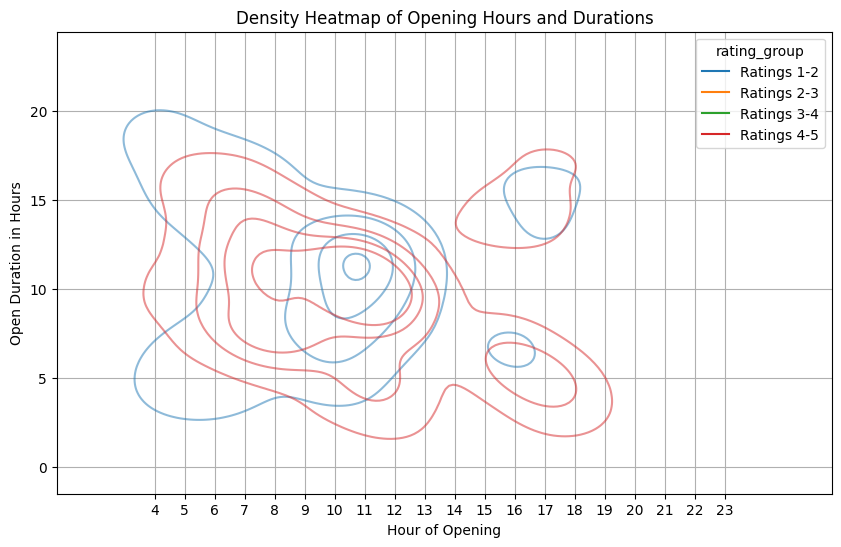

In [149]:
# Using Seaborn’s sns.kdeplot() for a Smoothed Density Heatmap
# Only care about the best and the worst rated restaurants
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

df_businessV2_best_and_worst = df_businessV2[(df_businessV2["rating_group"] == "Ratings 1-2") | 
                                             (df_businessV2["rating_group"] == "Ratings 4-5")]

# Create a density plot
sns.kdeplot(
    data = df_businessV2_best_and_worst,
    x=df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"], 
    y=df_businessV2_best_and_worst["Monday_Open_Duration_Float"], 
    hue="rating_group",
    fill=False, 
    alpha=0.50,
    levels=5
)

# Customize the plot
plt.xlabel('Hour of Opening')
plt.ylabel('Open Duration in Hours')
plt.title('Density Heatmap of Opening Hours and Durations')
plt.grid(True)

# Set x-ticks to whole numbers
plt.xticks(range(int(min(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"])), 
                 int(max(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"]) + 1)))
plt.show()


<IntegerArray>
[19147, 19124, 19139, 19130, 19126, 19121, 19154, 19143, 19146, 19106, 19107,
 19123, 19148, 19104, 19111, 19135, 19103, 19145, 19140, 19141, 19150, 19115,
 19149, 19125, 19127, 19120, 19114, 19129, 19122, 19132, 19128, 19133, 19151,
 19134, 19144, 19195, 19118, 19138, 19131, 19102, 19137, 19153, 19136, 19113,
 19142, 19152, 19116, 19119]
Length: 48, dtype: Int64
['Ratings 4-5', 'Ratings 1-2']
Categories (4, object): ['Ratings 1-2' < 'Ratings 2-3' < 'Ratings 3-4' < 'Ratings 4-5']


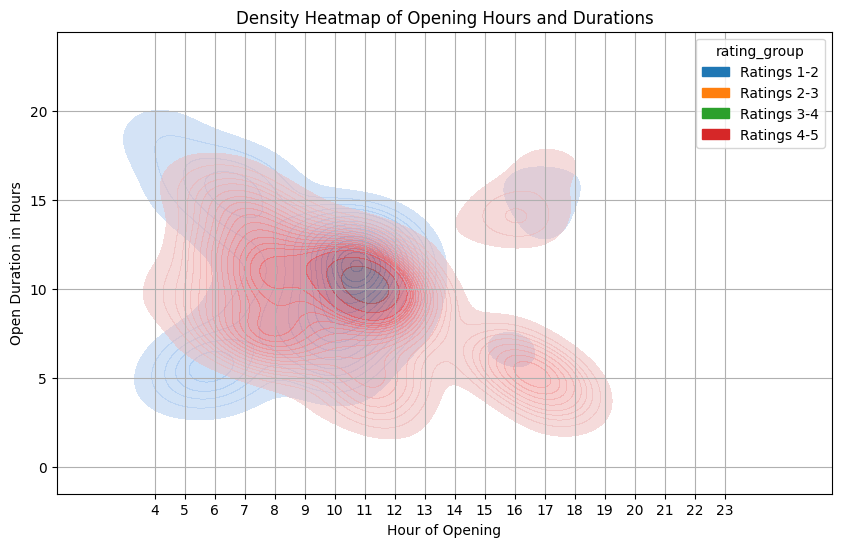

In [150]:
# Using Seaborn’s sns.kdeplot() for a Smoothed Density Heatmap
# Only care about the best and the worst rated restaurants
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

df_businessV2_best_and_worst = df_businessV2[(df_businessV2["rating_group"] == "Ratings 1-2") | 
                                             (df_businessV2["rating_group"] == "Ratings 4-5")]

print(df_businessV2_best_and_worst["postal_code"].unique())

# Create a density plot
sns.kdeplot(
    data = df_businessV2_best_and_worst,
    x=df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"], 
    y=df_businessV2_best_and_worst["Monday_Open_Duration_Float"], 
    hue="rating_group",
    fill=True, 
    alpha=0.5,
    levels=20
)

# Customize the plot
plt.xlabel('Hour of Opening')
plt.ylabel('Open Duration in Hours')
plt.title('Density Heatmap of Opening Hours and Durations')
plt.grid(True)

# Set x-ticks to whole numbers
plt.xticks(range(int(min(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"])), 
                 int(max(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"]) + 1)))

print(df_businessV2_best_and_worst["rating_group"].unique())
plt.show()

<IntegerArray>
[19147, 19139, 19124]
Length: 3, dtype: Int64
['Ratings 4-5']
Categories (4, object): ['Ratings 1-2' < 'Ratings 2-3' < 'Ratings 3-4' < 'Ratings 4-5']


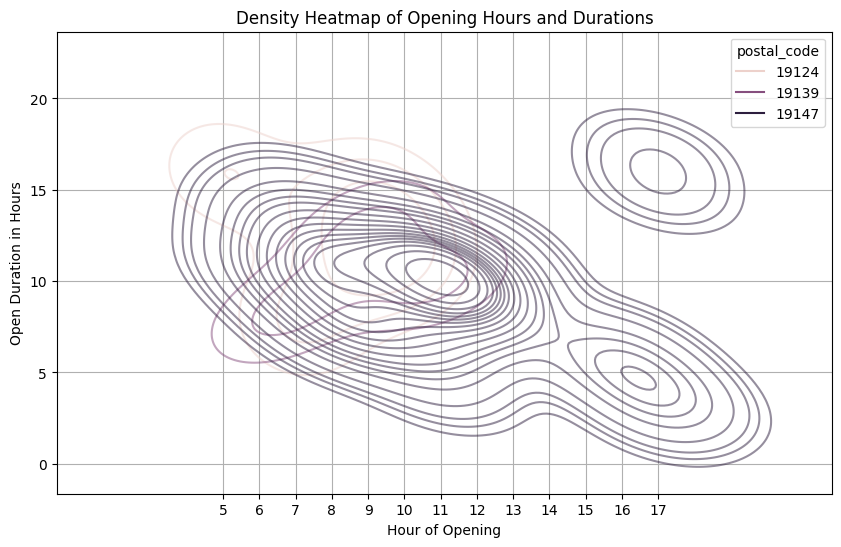

In [151]:
# Using Seaborn’s sns.kdeplot() for a Smoothed Density Heatmap
# Only care about the best and the worst rated restaurants
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))

df_businessV2_best_and_worst = df_businessV2[
                                             (df_businessV2["rating_group"] == "Ratings 4-5") & 
                                             (df_businessV2["postal_code"].isin([19147, 19124, 19139]))]

print(df_businessV2_best_and_worst["postal_code"].unique())

# Create a density plot
sns.kdeplot(
    data = df_businessV2_best_and_worst,
    x=df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"], 
    y=df_businessV2_best_and_worst["Monday_Open_Duration_Float"], 
    hue="postal_code",
    fill=False, 
    alpha=0.5,
    levels=20
)

# Customize the plot
plt.xlabel('Hour of Opening')
plt.ylabel('Open Duration in Hours')
plt.title('Density Heatmap of Opening Hours and Durations')
plt.grid(True)

# Set x-ticks to whole numbers
plt.xticks(range(int(min(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"])), 
                 int(max(df_businessV2_best_and_worst["Monday_Hour_Of_Opening_Float"]) + 1)))

print(df_businessV2_best_and_worst["rating_group"].unique())
plt.show()

In [152]:
df_businesses = pd.read_csv("Cleaned Files/cleaned_businessV2.csv")
df_reviews = pd.read_csv("Cleaned Files/crosslisted_reviews.csv")
df_reviews.isnull().sum()

df_businesses.columns


Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours_Monday', 'hours_Tuesday', 'hours_Wednesday',
       'hours_Thursday', 'hours_Friday', 'hours_Saturday', 'hours_Sunday'],
      dtype='object')

# Data Exploration
The following section is not used to create visualizations. It is only used to explore the data and get an understanding of how it looks.

In [153]:
# Take a look in the categories column. In "categories" column, a list of strings resides. But we are interested in the substrings between the commas.
# df_reviews.columns

# Ensure categories is a string type
df_business['categories'] = df_business['categories'].astype(str)

# Filter out rows with missing values in 'categories'
df_filtered = df_business[df_business['categories'].notna()]

# Get unique categories (excluding missing values)
unique_categories = df_filtered['categories'].unique()

# Sort the unique categories
sorted_categories = np.sort(unique_categories)

for item in sorted_categories:
    print(item)

Active Life, Beer Gardens, Grocery, Middle Eastern, Specialty Food, American (New), Parks, Cafes, Food, Nightlife, Restaurants, Coffee & Tea, Lebanese
Active Life, Bowling, Bars, Nightlife, Arts & Entertainment, Arcades, Restaurants, American (Traditional), Sports Bars
Active Life, Nightlife, Bars, American (Traditional), Bowling, Restaurants, American (New), Gastropubs
Active Life, Playgrounds, American (Traditional), Restaurants
Active Life, Sports Clubs, Social Clubs, Restaurants, Italian, Nightlife, American (Traditional), Cocktail Bars, Arts & Entertainment, Bars
Adult Education, Specialty Schools, Kitchen Supplies, Restaurants, Cooking Schools, Education, Kitchen & Bath, Home & Garden, Shopping
Afghan, Restaurants
African, American (Traditional), Restaurants
African, Caribbean, Restaurants
African, Restaurants
African, Restaurants, American (Traditional)
African, Restaurants, Caterers, Event Planning & Services, South African
African, Vegetarian, Halal, Restaurants
American (New)

In [154]:
# Print all the categories as separated strings
# Extract substrings between commas
result_list = []
for item in sorted_categories:
    substrings = item.split(",")
    for substring in substrings:
        stripped_substring = substring.strip()
        if stripped_substring not in result_list:
            result_list.append(stripped_substring)

sorted_results = np.sort(result_list)

print(*sorted_results, sep='\n')

Acai Bowls
Active Life
Adult
Adult Education
Adult Entertainment
Afghan
African
Airport Shuttles
American (New)
American (Traditional)
Apartments
Appliances
Arabic
Arcades
Argentine
Armenian
Art Classes
Art Galleries
Art Museums
Arts & Crafts
Arts & Entertainment
Asian Fusion
Australian
Austrian
Automotive
Axe Throwing
Bagels
Bakeries
Bangladeshi
Banks & Credit Unions
Barbeque
Barbers
Bars
Bartenders
Basque
Beaches
Beauty & Spas
Beer
Beer Bar
Beer Gardens
Beer Hall
Belgian
Beverage Store
Bistros
Boat Charters
Boat Tours
Boating
Books
Bookstores
Bowling
Brasseries
Brazilian
Breakfast & Brunch
Breweries
Brewpubs
British
Bubble Tea
Buddhist Temples
Buffets
Burgers
Burmese
Butcher
Cafes
Cafeteria
Cajun/Creole
Cambodian
Candle Stores
Candy Stores
Cannabis Clinics
Cannabis Dispensaries
Cantonese
Cards & Stationery
Caribbean
Casinos
Caterers
Champagne Bars
Cheese Shops
Cheesesteaks
Chicken Shop
Chicken Wings
Chinese
Chocolatiers & Shops
Cideries
Cocktail Bars
Coffee & Tea
Coffee Roasteries
Co

## Available Columns

In [155]:
# Get an overview of all available columns
for item in np.sort(df_joined.columns):
    print(item)

Year
address
business_id
business_stars
categories
category_of_interest
city
date
hours_Friday
hours_Monday
hours_Saturday
hours_Sunday
hours_Thursday
hours_Tuesday
hours_Wednesday
is_open
latitude
longitude
name
postal_code
review_count
review_id
review_stars
state
